## Reconhecimentos de gestos e ações com CNN

## Importação das bibliotecas e montagem do drive

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Carregamento da imagem

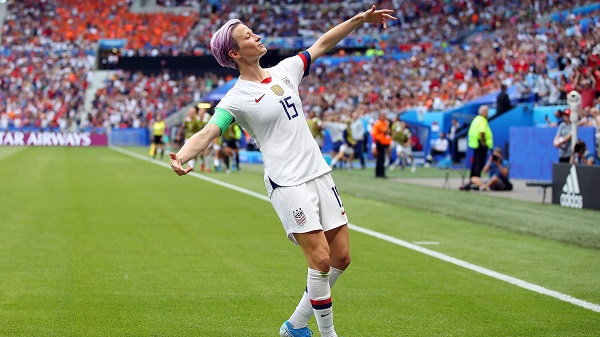

In [3]:
imagem = cv2.imread('/content/drive/MyDrive/estudo de visao computacional/Images/megan.jpg')
cv2_imshow(imagem)

In [4]:
imagem.shape

(337, 600, 3)

In [5]:
#mudando o formato da imagem, para blob que é o formato esperado pela função do opencv
imagem_blob = cv2.dnn.blobFromImage(imagem, scalefactor=1.0/255,
                                    size=(imagem.shape[1], imagem.shape[0]))

In [6]:
imagem_blob.shape

(1, 3, 337, 600)

## Carregamento da rede neural
- usando caffe deep learning framework

In [7]:
rede = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/estudo de visao computacional/Weights/pose_deploy_linevec_faster_4_stages.prototxt', #primeiro parametro: arquitetura
                                '/content/drive/MyDrive/estudo de visao computacional/Weights/pose_iter_160000.caffemodel') #segundo parametro: pesos

In [8]:
rede.getLayerNames()

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [9]:
len(rede.getLayerNames())

127

## Previsão dos pontos corporais

In [10]:
rede.setInput(imagem_blob)
output = rede.forward()

In [11]:
output.shape

(1, 44, 43, 75)

In [12]:
posicao_largura = output.shape[3]
posicao_altura = output.shape[2]

In [13]:
numero_pontos = 15
pontos = []
threshold = 0.1
for i in range(numero_pontos):
  mapa_confianca = output[0, i , :, :]
  _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca) #1°- valor minimo, 2° confiança do val max, 3° confiança valor minimo, 4° localização
  print(confianca)
  print(ponto)
  #os pontos são pequendos pois a rede neural redimensiona a imagem

0.7554596662521362
(28, 3)
0.9123879075050354
(31, 8)
0.6697722673416138
(29, 12)
0.7503767609596252
(26, 16)
0.7385097146034241
(22, 19)
0.7186093330383301
(35, 8)
0.7753999829292297
(40, 5)
0.7418547868728638
(45, 2)
0.5037320256233215
(36, 23)
0.7334719300270081
(40, 32)
0.6221848130226135
(40, 41)
0.5226558446884155
(39, 21)
0.94032222032547
(42, 32)
0.7596977949142456
(37, 39)
0.7704717516899109
(35, 16)


In [14]:
numero_pontos = 15
pontos = []
threshold = 0.1
for i in range(numero_pontos):
  mapa_confianca = output[0, i , :, :]
  _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca) #1°- valor minimo, 2° confiança do val max, 3° confiança valor minimo, 4° localização
  #pegando os tamanhos reais da imagem
  x = int((imagem.shape[1] * ponto[0]) / posicao_largura)
  y = int((imagem.shape[0] * ponto[1]) / posicao_altura)

  if confianca > threshold:
    cv2.circle(imagem, (x,y), 5, (0,0,255), thickness=-1) #com esse parametro thickness o circulo fica com preenchimento
    cv2.putText(imagem, f'{i}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0))
    pontos.append((x,y))
  else:
    pontos.append(None)

In [15]:
pontos

[(224, 23),
 (248, 62),
 (232, 94),
 (208, 125),
 (176, 148),
 (280, 62),
 (320, 39),
 (360, 15),
 (288, 180),
 (320, 250),
 (320, 321),
 (312, 164),
 (336, 250),
 (296, 305),
 (280, 125)]

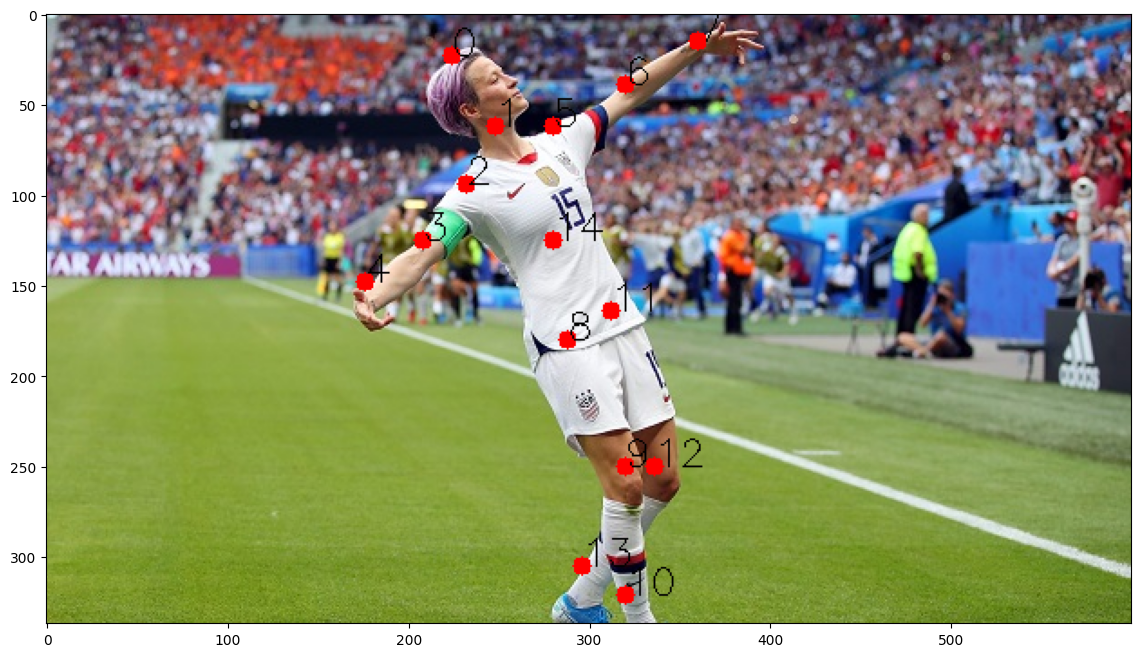

In [16]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

In [17]:
ponto_conexoes = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14],
                  [14, 8], [8,9], [9,10], [14,11], [11,12], [12,13]]

In [18]:
for conexao in ponto_conexoes:
  parteA  = conexao[0]
  parteB = conexao[1]
  if pontos[parteA] and pontos[parteB]:
    cv2.line(imagem, pontos[parteA], pontos[parteB], (255,0,0))

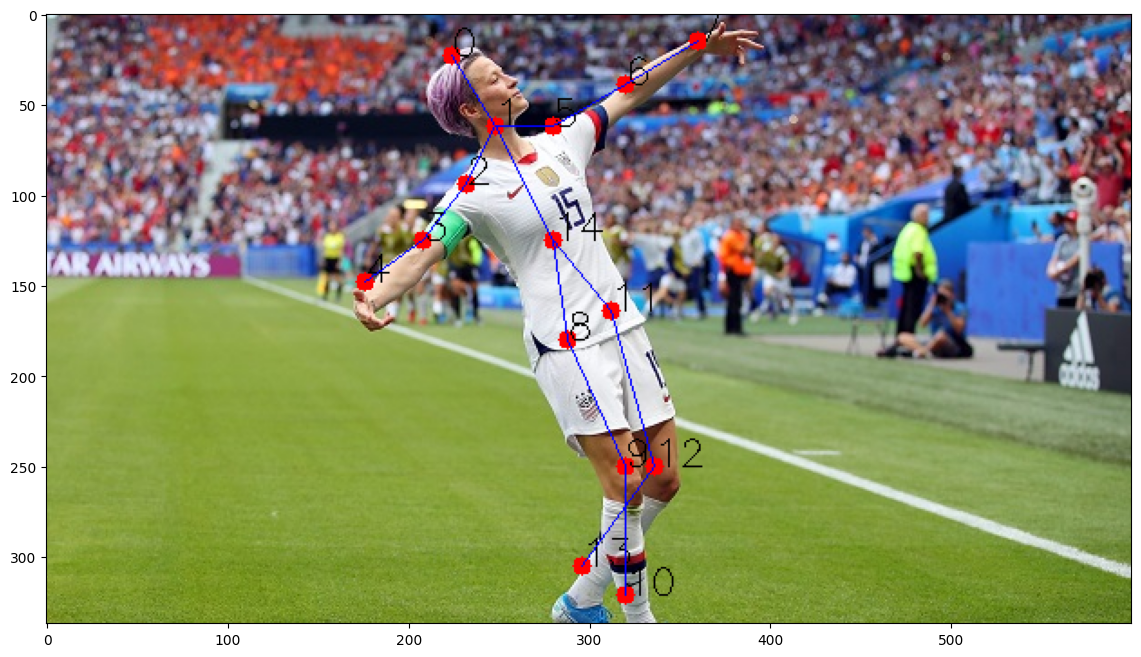

In [19]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

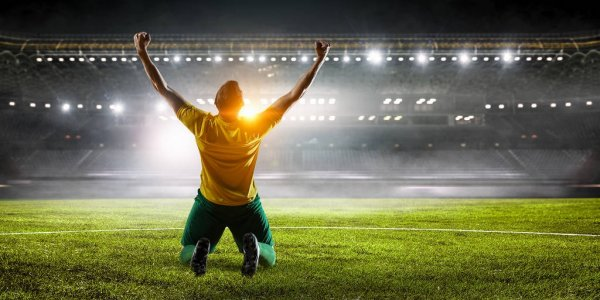

In [20]:
imagem2 = cv2.imread('/content/drive/MyDrive/estudo de visao computacional/Images/player.jpg')
cv2_imshow(imagem2)

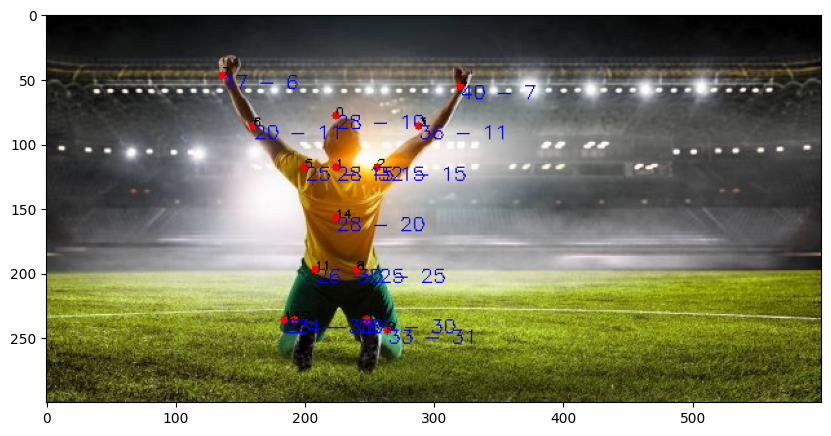

In [21]:
imagem_blob2 = cv2.dnn.blobFromImage(image = imagem2, scalefactor=1.0 / 255, size = (imagem2.shape[1], imagem2.shape[0]))
rede.setInput(imagem_blob2)
output2 = rede.forward()
posicao_largura = output2.shape[3]
posicao_altura = output2.shape[2]
numero_pontos = 15
pontos = []
threshold = 0.1
for i in range(numero_pontos):
  mapa_confianca = output2[0, i, :, :]
  _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca)
  x = int((imagem2.shape[1] * ponto[0]) / posicao_largura)
  y = int((imagem2.shape[0] * ponto[1]) / posicao_altura)

  if confianca > threshold:
    cv2.circle(imagem2, (x,y), 3, (0,0,255), thickness=-1)
    cv2.putText(imagem2, f'{i}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, .3, (0,0,0))
    cv2.putText(imagem2, f'{ponto[0]} - {ponto[1]}', (x,y+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0)) #quanto mais proximo da borda superior da imagem, menor o valor
    pontos.append((x, y))
  else:
    pontos.append(None)

plt.figure(figsize = [10,14])
plt.imshow(cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB))


In [30]:
def verifica_bracos(pontos):
  cabeca, pulso_direito, pulso_esquerdo = 0, 0, 0
  for i, ponto in enumerate(pontos):
    if i == 0:
      cabeca = int(ponto[1])
    elif i == 4:
      pulso_direito = int(ponto[1])
    elif i == 7:
      pulso_esquerdo = int(ponto[1])

  if pulso_direito < cabeca and pulso_esquerdo < cabeca:
    return(True)
  else:
    return(False)

In [23]:
verifica_bracos(pontos)

'1'

## Braços acima da cabeça em videos

In [33]:
video = '/content/drive/MyDrive/estudo de visao computacional/Videos/gesture1.mp4'
captura = cv2.VideoCapture(video)
conectado, frame = captura.read()

In [34]:
resultado = '/content/gesture1_resultado.mp4'
salvar_video = cv2.VideoWriter(resultado, cv2.VideoWriter_fourcc(*'XVID'), 10, (frame.shape[1], frame.shape[0]))

In [35]:
threshold = 0.1
while cv2.waitKey(1) < 0:
  conectado, frame = captura.read()

  if not conectado:
    break

  imagem_blob = cv2.dnn.blobFromImage(image = frame, scalefactor=1.0 / 255, size = (256, 256))
  rede.setInput(imagem_blob)
  output = rede.forward()
  posicao_largura = output.shape[2]
  posicao_altura = output.shape[3]

  numero_pontos = 15
  pontos = []
  for i in range(numero_pontos):
    mapa_confianca = output[0, i, :, :]
    _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca)
    x = int((frame.shape[1] * ponto[0]) / posicao_largura)
    y = int((frame.shape[0] * ponto[1]) / posicao_altura)

    if confianca > threshold:
      cv2.circle(frame, (x,y), 3, (0,0,255), thickness=-1)
      cv2.putText(frame, f'{i}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, .3, (0,0,0))
      pontos.append((x, y))
    else:
      pontos.append(None)

  for conexao in ponto_conexoes:
    parteA  = conexao[0]
    parteB = conexao[1]
    if pontos[parteA] and pontos[parteB]:
      cv2.line(frame, pontos[parteA], pontos[parteB], (255,0,0))

  if verifica_bracos(pontos) and verificar_pernas:
    cv2.putText(frame, 'Completo', (50,200), cv2.FONT_HERSHEY_COMPLEX, 3, (0,0,255))

  cv2_imshow(frame)
  salvar_video.write(frame)
salvar_video.release()
print('processamento concluido')

Output hidden; open in https://colab.research.google.com to view.

In [31]:
def verificar_pernas(pontos):
  for i, ponto in enumerate(pontos):
    if i == 10:
      perna_esquerda = ponto[0]
    if i == 13:
      perna_direita = ponto[0]
  distancia = perna_esquerda - perna_direita
  if distancia > 60:
    return True
  else:
    return False